## Retail Investor Solution Project (MVP)

**Author:** Xibei(Julian) He
<br>
**Date:** July 7, 2022

## Overview

The goal to be achieved in this project is to build a comprehensive quantitative model to provide assistance to retail investor. 
This investment assistance tool provides predicitons on market movement on next trading day till next 12 months, recommendations on asset selection, and generation of model portfolios.  

## Business Problem

Trading is hard. It is so hard that 70-80% of investors or traders lose money on average.Acorrding to a study in Brazil at Sao Paulo School of Economics and University of Sao Paulo, only 3% of traders make money and under 1% do better than minimum wage. Specifically in the US, the millenium generation has gradually become the pillar of the society, their desires to become financially sucessful for the future is strong. In fact, we have seen the increasing number of retail investors in the equity market in the past couple of years. The percentage of participation by younger investors has increaed from 10-15% from last decade to approach 25% this year. A great problem to be solves is how to navigate investments accounts for those younger genrations and people who do not have time to invest but expect a decent accumulation on their retirement accounts.

## Data Understanding

We are using multiple datasets for this project.
- In deriving market movement prediction, datasets are companies from S&P daily trading data. Daily return is the target variable.

- For recommendation system, we are using data from Morningstar. 

Importing packages

In [1]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate,GridSearchCV
from surprise.prediction_algorithms import SVD, SVDpp, NMF, BaselineOnly,\
                                            NormalPredictor, KNNBasic
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from scipy import stats

# Technical Indicators
# import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
import statsmodels.api as sm
yf.pdr_override()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore")

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict



C:\Users\Trader\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Trader\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Basic stuff
import pandas as pd
import numpy as np
import datetime
from calendar import monthrange
from dateutil.relativedelta import relativedelta

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['patch.facecolor'] = 'white' # This is helpful if you're using Colab in dark mode
plt.rcParams['figure.figsize'] = 15, 7
import graphviz

# Reading Rdata - need to install in Collab
!pip install pyreadr
import pyreadr

# Regression type stuff
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Trees
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Deep learning stuff
import tensorflow as tf
from tensorflow import keras

## EDA & Data Preparation

In [3]:
aapl = web.get_data_yahoo("AAPL",
start = "2012-01-01",
end = "2022-06-01")

In [4]:
aapl

High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2022-05-25  141.789993  138.339996  138.429993  140.520004   92482700.0   
2022-05-26  144.339996  137.139999  137.389999  143.779999   90601500.0   
2022-05-27  149.679993  145.259995  145.389999  149.639999   90978500.0   
2022-05-31  150.660004  146.839996  149.070007  148.839996  103718400.0   
2022-06-01  151.740005  147.679993  149.899994  148.710007   74286600.0   

             Adj Close  
Date                    
2012-01-03   12.557467  
2012-01-04   12.624949  
2012-01-05   12.765112  
2012-01-06   12.898558  
2012-01-09   12.878096  
...                ...  
2022-05-25  140.520004  
2022-05-26  143.779999  
2022-05-27  149.639999  
2022-05-31  148.839996  
2022-06-01  148.710007  

[2621 rows x 6 columns]

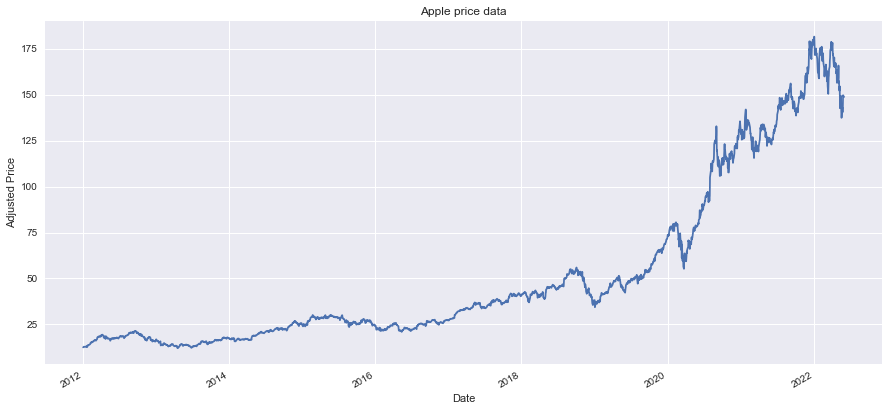

In [5]:
aapl["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Apple price data")
plt.show()

In [6]:
aapl_daily_returns = aapl['Adj Close'].pct_change()
aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()

In [7]:
aapl_daily_returns

Date
2012-01-03         NaN
2012-01-04    0.005374
2012-01-05    0.011102
2012-01-06    0.010454
2012-01-09   -0.001586
                ...   
2022-05-25    0.001140
2022-05-26    0.023200
2022-05-27    0.040757
2022-05-31   -0.005346
2022-06-01   -0.000873
Name: Adj Close, Length: 2621, dtype: float64

In [8]:
aapl_monthly_returns

Date
2012-01-31         NaN
2012-02-29    0.188310
2012-03-31    0.105284
2012-04-30   -0.025969
2012-05-31   -0.010703
                ...   
2022-02-28   -0.054066
2022-03-31    0.057473
2022-04-30   -0.097131
2022-05-31   -0.054496
2022-06-30   -0.000873
Freq: M, Name: Adj Close, Length: 126, dtype: float64

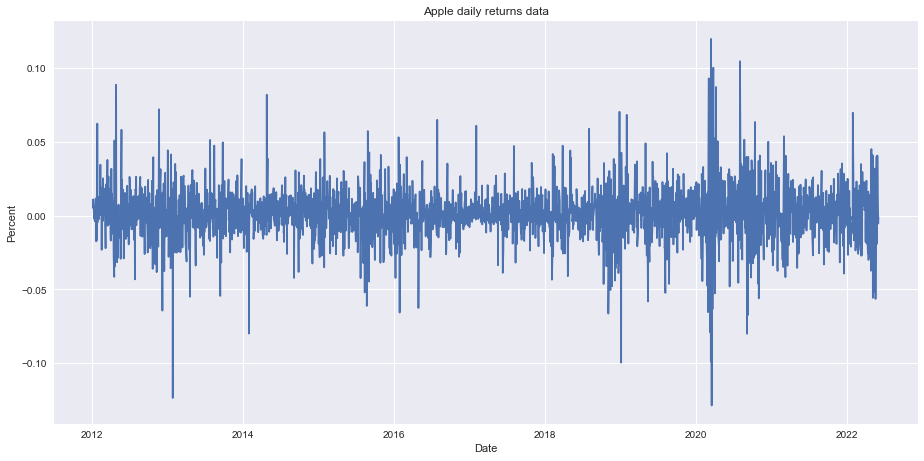

In [9]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(aapl_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns data")
plt.show()

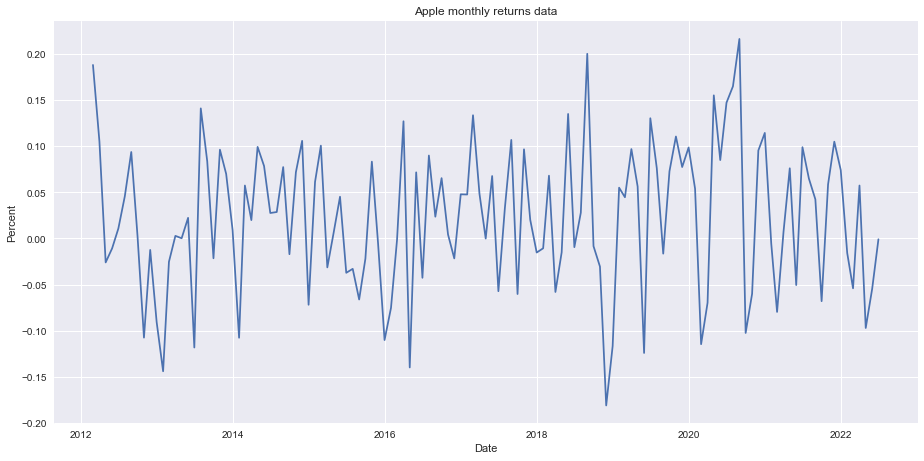

In [10]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(aapl_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple monthly returns data")
plt.show()

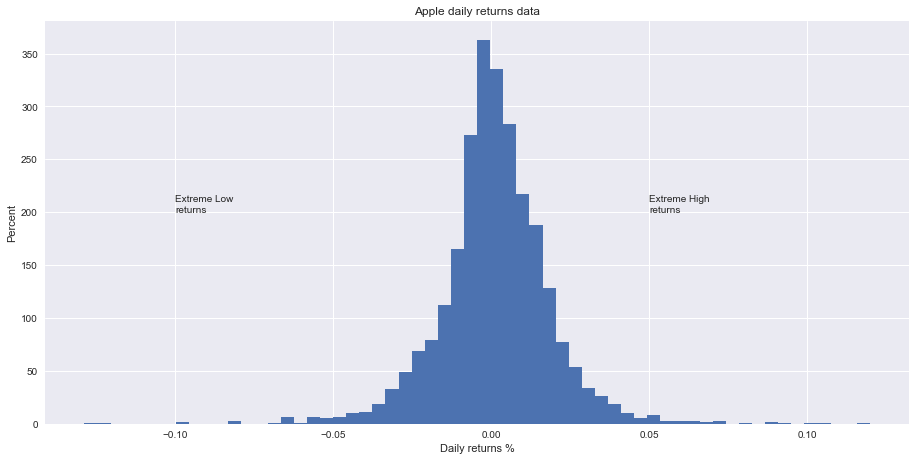

In [11]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
aapl_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns data")
ax1.text(-0.1,200,"Extreme Low\nreturns")
ax1.text(0.05,200,"Extreme High\nreturns")
plt.show()

In [12]:
aapl_cum_returns = (aapl_daily_returns + 1).cumprod()

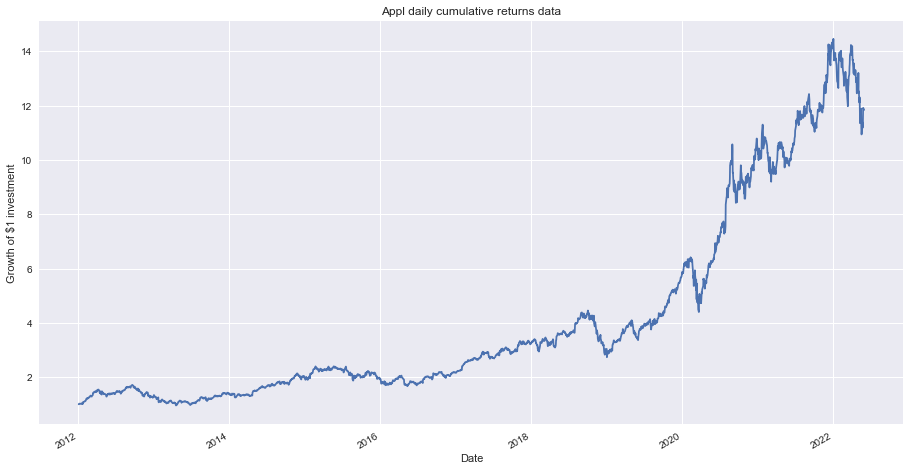

In [13]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
aapl_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Appl daily cumulative returns data")
plt.show()

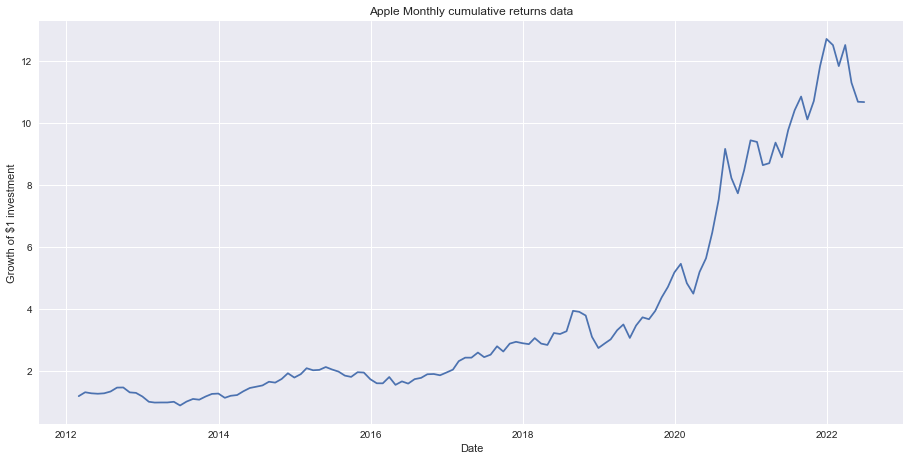

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
aapl_cum_returns = (aapl_monthly_returns + 1).cumprod()
ax1.plot(aapl_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Apple Monthly cumulative returns data")
plt.show()

Prepare multiple stock's data for model portfolio generation in the later step.

In [15]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA"]
prices = web.get_data_yahoo(tickers,
start = "2012-01-01",
end = "2022-06-01")

In [16]:
prices

Attributes   Adj Close                                                   \
Symbols           AAPL        MSFT        AMZN        GOOGL        TSLA   
Date                                                                      
2012-01-03   12.557466   21.572889    8.951500   333.038025    5.616000   
2012-01-04   12.624949   22.080580    8.875500   334.474487    5.542000   
2012-01-05   12.765115   22.306219    8.880500   329.834839    5.424000   
2012-01-06   12.898554   22.652742    9.130500   325.335327    5.382000   
2012-01-09   12.878098   22.354574    8.928000   311.541534    5.450000   
...                ...         ...         ...          ...         ...   
2022-05-25  140.520004  262.519989  106.775002  2116.100098  658.799988   
2022-05-26  143.779999  265.899994  111.077499  2155.850098  707.729980   
2022-05-27  149.639999  273.239990  115.146500  2246.330078  759.630005   
2022-05-31  148.839996  271.869995  120.209503  2275.239990  758.260010   
2022-06-01  148.710007  272.420013  121.683998  2277.840088  740.369995   

Attributes       Close                                                   ...  \
Symbols           AAPL        MSFT        AMZN        GOOGL        TSLA  ...   
Date                                                                     ...   
2012-01-03   14.686786   26.770000    8.951500   333.038025    5.616000  ...   
2012-01-04   14.765714   27.400000    8.875500   334.474487    5.542000  ...   
2012-01-05   14.929643   27.680000    8.880500   329.834839    5.424000  ...   
2012-01-06   15.085714   28.110001    9.130500   325.335327    5.382000  ...   
2012-01-09   15.061786   27.740000    8.928000   311.541534    5.450000  ...   
...                ...         ...         ...          ...         ...  ...   
2022-05-25  140.520004  262.519989  106.775002  2116.100098  658.799988  ...   
2022-05-26  143.779999  265.899994  111.077499  2155.850098  707.729980  ...   
2022-05-27  149.639999  273.239990  115.146500  2246.330078  759.630005  ...   
2022-05-31  148.839996  271.869995  120.209503  2275.239990  758.260010  ...   
2022-06-01  148.710007  272.420013  121.683998  2277.840088  740.369995  ...   

Attributes        Open                                                   \
Symbols           AAPL        MSFT        AMZN        GOOGL        TSLA   
Date                                                                      
2012-01-03   14.621429   26.549999    8.794500   326.796783    5.788000   
2012-01-04   14.642857   26.820000    8.960500   332.847839    5.642000   
2012-01-05   14.819643   27.379999    8.797000   331.396393    5.552000   
2012-01-06   14.991786   27.530001    8.903500   329.904907    5.440000   
2012-01-09   15.196429   28.049999    9.138000   323.573578    5.400000   
...                ...         ...         ...          ...         ...   
2022-05-25  138.429993  258.140015  103.655502  2099.709961  623.849976   
2022-05-26  137.389999  262.269989  107.970001  2113.540039  661.419983   
2022-05-27  145.389999  268.480011  113.550003  2189.659912  723.250000   
2022-05-31  149.070007  272.529999  116.279999  2254.929932  773.840027   
2022-06-01  149.899994  275.200012  122.255997  2297.100098  755.159973   

Attributes       Volume                                                   
Symbols            AAPL        MSFT         AMZN       GOOGL        TSLA  
Date                                                                      
2012-01-03  302220800.0  64731500.0  102216000.0   7345647.0   4640500.0  
2012-01-04  260022000.0  80516100.0   84104000.0   5722272.0   3150500.0  
2012-01-05  271269600.0  56081400.0   76182000.0   6559234.0   5027500.0  
2012-01-06  318292800.0  99455500.0  140168000.0   5380414.0   4931500.0  
2012-01-09  394024400.0  59706800.0  101138000.0  11633555.0   4485000.0  
...                 ...         ...          ...         ...         ...  
2022-05-25   92482700.0  28547900.0   93120000.0   2012900.0  30713100.0  
2022-05-26   90601500.0  25

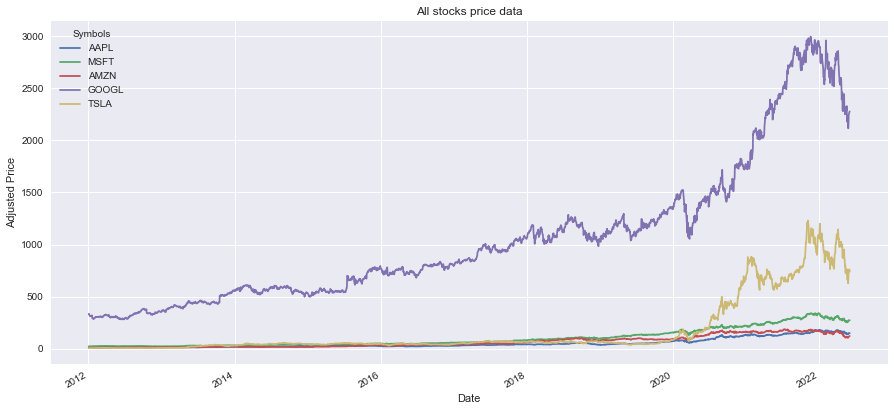

In [17]:
prices["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("All stocks price data")
plt.show()

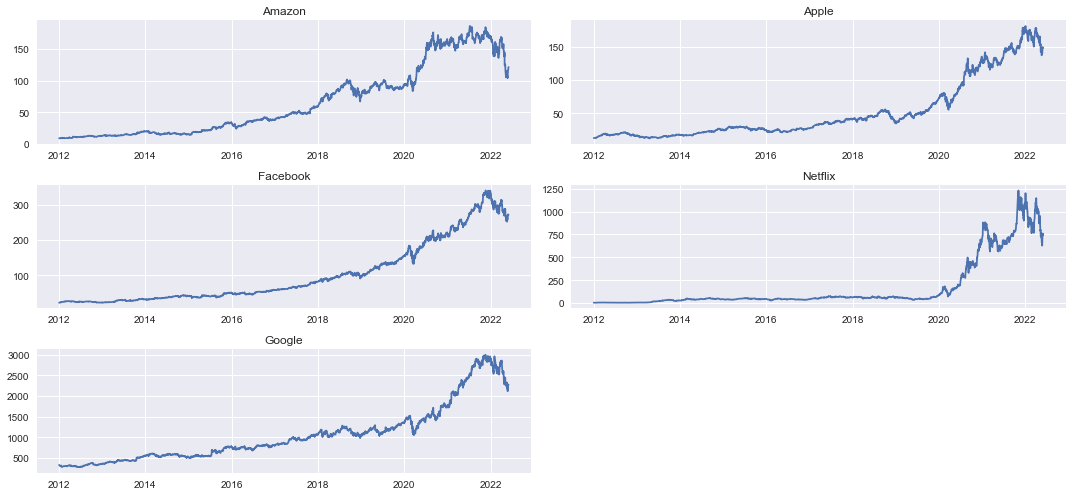

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(prices['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(prices['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(prices['Adj Close']['MSFT'])
ax3.set_title("Facebook")
ax4.plot(prices['Adj Close']['TSLA'])
ax4.set_title("Netflix")
ax5.plot(prices['Adj Close']['GOOGL'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()

In [19]:
multpl_stock_daily_returns = prices['Adj Close'].pct_change()
multpl_stock_monthly_returns = prices['Adj Close'].resample('M').ffill().pct_change()

<Figure size 1080x504 with 0 Axes>

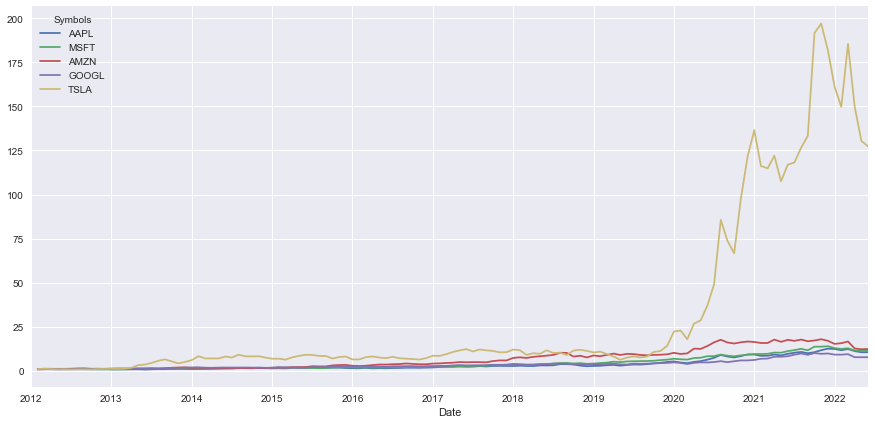

In [20]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

In [21]:
multpl_stock_monthly_returns.mean()

Symbols
AAPL     0.022222
MSFT     0.021386
AMZN     0.023768
GOOGL    0.018596
TSLA     0.053560
dtype: float64

In [22]:
multpl_stock_monthly_returns.std()

Symbols
AAPL     0.079446
MSFT     0.059163
AMZN     0.082897
GOOGL    0.063708
TSLA     0.182193
dtype: float64

In [23]:
multpl_stock_monthly_returns.corr()

Symbols      AAPL      MSFT      AMZN     GOOGL      TSLA
Symbols                                                  
AAPL     1.000000  0.496045  0.422425  0.393457  0.366162
MSFT     0.496045  1.000000  0.485885  0.552365  0.354191
AMZN     0.422425  0.485885  1.000000  0.575345  0.250196
GOOGL    0.393457  0.552365  0.575345  1.000000  0.280938
TSLA     0.366162  0.354191  0.250196  0.280938  1.000000

In [24]:
multpl_stock_monthly_returns.cov()

Symbols      AAPL      MSFT      AMZN     GOOGL      TSLA
Symbols                                                  
AAPL     0.006312  0.002332  0.002782  0.001991  0.005300
MSFT     0.002332  0.003500  0.002383  0.002082  0.003818
AMZN     0.002782  0.002383  0.006872  0.003039  0.003779
GOOGL    0.001991  0.002082  0.003039  0.004059  0.003261
TSLA     0.005300  0.003818  0.003779  0.003261  0.033194

In [25]:
w = [0.2,0.2,0.2,0.2,0.2]

In [26]:
price_data = prices['Adj Close']
price_data

Symbols           AAPL        MSFT        AMZN        GOOGL        TSLA
Date                                                                   
2012-01-03   12.557466   21.572889    8.951500   333.038025    5.616000
2012-01-04   12.624949   22.080580    8.875500   334.474487    5.542000
2012-01-05   12.765115   22.306219    8.880500   329.834839    5.424000
2012-01-06   12.898554   22.652742    9.130500   325.335327    5.382000
2012-01-09   12.878098   22.354574    8.928000   311.541534    5.450000
...                ...         ...         ...          ...         ...
2022-05-25  140.520004  262.519989  106.775002  2116.100098  658.799988
2022-05-26  143.779999  265.899994  111.077499  2155.850098  707.729980
2022-05-27  149.639999  273.239990  115.146500  2246.330078  759.630005
2022-05-31  148.839996  271.869995  120.209503  2275.239990  758.260010
2022-06-01  148.710007  272.420013  121.683998  2277.840088  740.369995

[2621 rows x 5 columns]

In [27]:
ret_data = price_data.pct_change()[1:]
ret_data.head()

Symbols         AAPL      MSFT      AMZN     GOOGL      TSLA
Date                                                        
2012-01-04  0.005374  0.023534 -0.008490  0.004313 -0.013177
2012-01-05  0.011102  0.010219  0.000563 -0.013871 -0.021292
2012-01-06  0.010453  0.015535  0.028152 -0.013642 -0.007743
2012-01-09 -0.001586 -0.013163 -0.022178 -0.042399  0.012635
2012-01-10  0.003580  0.003605  0.004368  0.001093  0.013578

In [28]:
weighted_returns = (w * ret_data)
weighted_returns.head()

Symbols         AAPL      MSFT      AMZN     GOOGL      TSLA
Date                                                        
2012-01-04  0.001075  0.004707 -0.001698  0.000863 -0.002635
2012-01-05  0.002220  0.002044  0.000113 -0.002774 -0.004258
2012-01-06  0.002091  0.003107  0.005630 -0.002728 -0.001549
2012-01-09 -0.000317 -0.002633 -0.004436 -0.008480  0.002527
2012-01-10  0.000716  0.000721  0.000874  0.000219  0.002716

In [29]:
port_ret = weighted_returns.sum(axis=1)
port_ret

Date
2012-01-04    0.002311
2012-01-05   -0.002656
2012-01-06    0.006551
2012-01-09   -0.013338
2012-01-10    0.005245
                ...   
2022-05-25    0.017045
2022-05-26    0.033885
2022-05-27    0.044059
2022-05-31    0.008935
2022-06-01   -0.001807
Length: 2620, dtype: float64

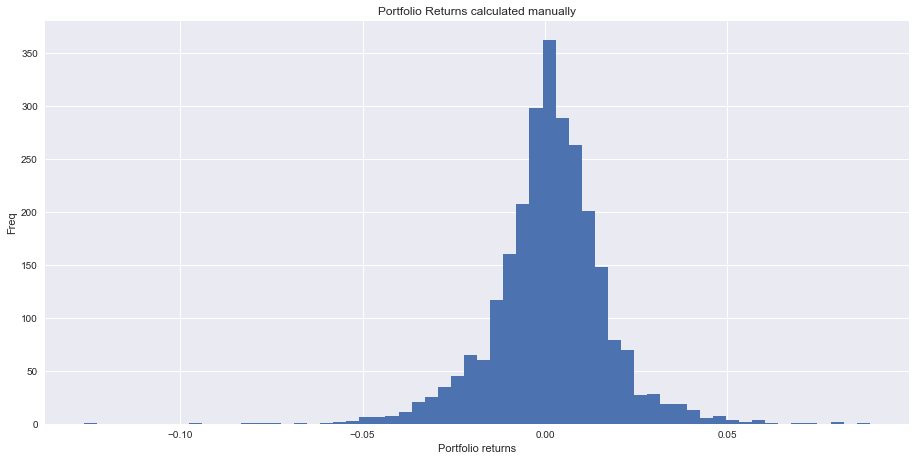

In [30]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [31]:
cumulative_ret = (port_ret + 1).cumprod()

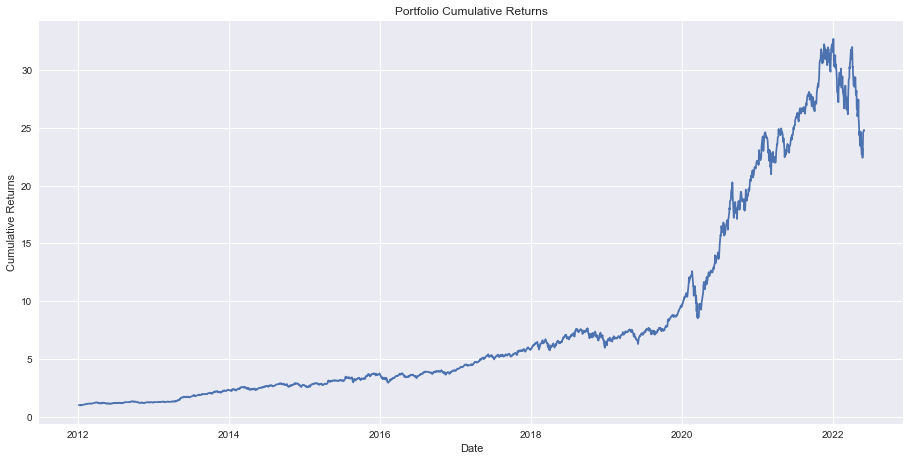

In [32]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();

In [33]:
geometric_port_return = np.prod(port_ret + 1) ** (252/port_ret.shape[0]) - 1
geometric_port_return

0.3616793915042047

In [34]:
annual_std = np.std(port_ret) * np.sqrt(252)
annual_std

0.2518580744140425

In [35]:
port_sharpe_ratio = geometric_port_return / annual_std
port_sharpe_ratio

1.4360444561710626

In [36]:
benchmark_price = web.get_data_yahoo('SPY',
                               start = '2012-01-01',
                               end = '2022-06-01')
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

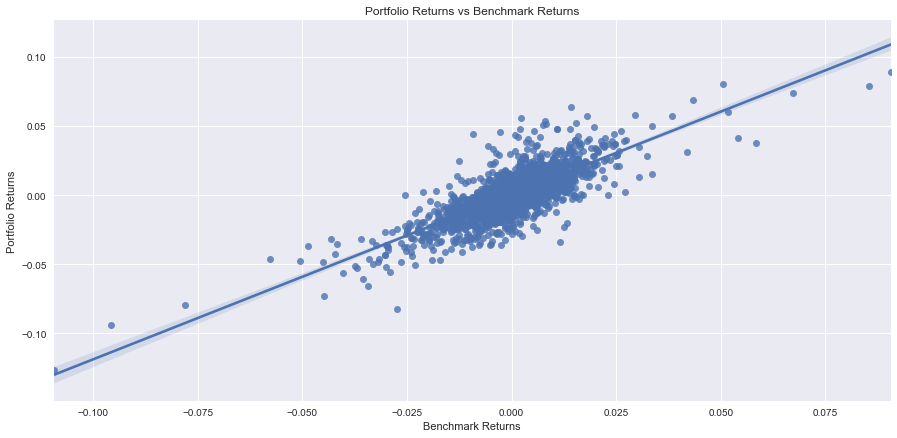

In [37]:
sns.regplot(benchmark_ret.values,
port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [38]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 1.1948


In [39]:
print("The portfolio alpha is", round(alpha,5))

The portfolio alpha is 0.00067


Exploring Morningstar datasets(This section has not finised yet)

In [40]:
df_totalReturns = pd.read_csv('data/MS_totalReturns.csv', nrows=503)
df_totalReturns

Name Ticker Return Date \n(Daily)  \
0                              3M Co    MMM            2022-07-05   
1                    A.O. Smith Corp    AOS            2022-07-05   
2                Abbott Laboratories    ABT            2022-07-05   
3                         AbbVie Inc   ABBV            2022-07-05   
4                        Abiomed Inc   ABMD            2022-07-05   
..                               ...    ...                   ...   
498                   Yum Brands Inc    YUM            2022-07-05   
499  Zebra Technologies Corp Class A   ZBRA            2022-07-05   
500       Zimmer Biomet Holdings Inc    ZBH            2022-07-05   
501                 Zions Bancorp NA   ZION            2022-07-05   
502               Zoetis Inc Class A    ZTS            2022-07-05   

     Total Ret \nYTD \n(Daily) \nUSD  Total Ret \n1 Day \n(Daily) \nUSD  \
0                             -25.58                               0.56   
1                             -32.50                               2.43   
2                             -21.67                              -0.83   
3                              16.04                               0.08   
4                             -28.54                               0.82   
..                               ...                                ...   
498                           -14.68                               0.53   
499                           -49.21                               1.00   
500                           -13.08                              -0.35   
501                           -17.92                              -0.58   
502                           -28.33                               0.02   

     Total Ret \n1 Wk \n(Daily) \nUSD  Total Ret \n1 Mo \n(Daily) \nUSD  \
0                               -0.86                            -11.48   
1                                4.01                             -5.67   
2                                2.18                             -6.24   
3                                0.94                              4.59   
4                                3.04                             -2.13   
..                                ...                               ...   
498                              3.39                             -1.09   
499                              0.04                             -9.69   
500                              0.39                            -11.19   
501                             -3.06                             -9.66   
502                              2.43                              3.10   

     Total Ret \n2 Mo \n(Daily) \nUSD  Total Ret \n3 Mo \n(Daily) \nUSD  \
0                              -12.55                            -12.22   
1                               -2.61                            -11.81   
2                               -3.28                             -8.13   
3                                1.15                             -4.95   
4                               -5.73                            -20.45   
..                                ...                               ...   
498                              1.97                              0.22   
499                            -13.06                            -28.65   
500                            -12.58                            -17.04   
501                            -10.36                            -20.09   
502                              1.63                             -7.34   

     Total Ret \n6 Mo \n(Daily) \nUSD  ...  \
0                              -26.35  ...   
1                              -30.63  ...   
2                              -18.44  ...   
3                               15.64  ...   
4                              -24.11  ...   
..                                ...  ...   
498                            -12.58  ...   
499                            -45.84  ...   
500                            -15.07  ...   
501                            -21.72  .

In [41]:
df_rating = pd.read_csv('data/MS_rating.csv', nrows=503)
df_rating

Name Ticker Date: Morningstar Rating  \
0                              3M Co    MMM                 7/5/2022   
1                    A.O. Smith Corp    AOS                      NaN   
2                Abbott Laboratories    ABT                 7/5/2022   
3                         AbbVie Inc   ABBV                 7/5/2022   
4                        Abiomed Inc   ABMD                      NaN   
..                               ...    ...                      ...   
498                   Yum Brands Inc    YUM                 7/5/2022   
499  Zebra Technologies Corp Class A   ZBRA                 7/5/2022   
500       Zimmer Biomet Holdings Inc    ZBH                 7/5/2022   
501                 Zions Bancorp NA   ZION                 7/5/2022   
502               Zoetis Inc Class A    ZTS                 7/5/2022   

     Morningstar \nRating \nOverall Morningstar \nFair Value \nStatus  \
0                               4.0                            Active   
1                               NaN                               NaN   
2                               3.0                            Active   
3                               2.0                            Active   
4                               NaN                               NaN   
..                              ...                               ...   
498                             3.0                            Active   
499                             4.0                            Active   
500                             5.0                            Active   
501                             4.0                            Active   
502                             3.0                            Active   

    Morningstar Fair Value Per Share Fair Value Uncertainty  \
0                                186                 Medium   
1                                NaN                    NaN   
2                                104                 Medium   
3                                125                   High   
4                                NaN                    NaN   
..                               ...                    ...   
498                              125                 Medium   
499                              449                   High   
500                              175                 Medium   
501                               70                 Medium   
502                              186                 Medium   

    Stock Capital Allocation \nRating Date: Economic Moat Economic Moat  ...  \
0                            Standard            7/5/2022          Wide  ...   
1                                 NaN                 NaN           NaN  ...   
2                            Standard            7/5/2022        Narrow  ...   
3                            Standard            7/5/2022        Narrow  ...   
4                                 NaN          12/31/2013          None  ...   
..                                ...                 ...           ...  ...   
498                          Standard            7/5/2022          Wide  ...   
499                          Standard            7/5/2022        Narrow  ...   
500                         Exemplary            7/5/2022          Wide  ...   
501                          Standard            7/5/2022          None  ...   
502                         Exemplary            7/5/2022          Wide  ...   

    Probability of Default Solvency Score Bear Market Rank Decile  \
0                      0.0         341.37                     9.0   
1                      0.0         211.71                     8.0   
2                      0.0         300.44                     5.0   
3                      0.0         490.74                     8.0   
4                      0.0            NaN                     7.0   
..                     ...            ...                     ...   
498                    0.0         469.86                     5.0   
499                 

In [42]:
df_snapshot = pd.read_csv('data/MS_snapshot.csv', nrows=503)
df_snapshot

Name Ticker  SEC CIK  \
0                              3M Co    MMM    66740   
1                    A.O. Smith Corp    AOS    91142   
2                Abbott Laboratories    ABT     1800   
3                         AbbVie Inc   ABBV  1551152   
4                        Abiomed Inc   ABMD   815094   
..                               ...    ...      ...   
498                   Yum Brands Inc    YUM  1041061   
499  Zebra Technologies Corp Class A   ZBRA   877212   
500       Zimmer Biomet Holdings Inc    ZBH  1136869   
501                 Zions Bancorp NA   ZION   109380   
502               Zoetis Inc Class A    ZTS  1555280   

                          Exchange Exchange Country Business Country  \
0    New York Stock Exchange, Inc.    United States    United States   
1    New York Stock Exchange, Inc.    United States    United States   
2    New York Stock Exchange, Inc.    United States    United States   
3    New York Stock Exchange, Inc.    United States    United States   
4             Nasdaq - All Markets    United States    United States   
..                             ...              ...              ...   
498  New York Stock Exchange, Inc.    United States    United States   
499           Nasdaq - All Markets    United States    United States   
500  New York Stock Exchange, Inc.    United States    United States   
501           Nasdaq - All Markets    United States    United States   
502  New York Stock Exchange, Inc.    United States    United States   

                   Company Name  Company Id       SecId  CUSIP  ...  \
0                         3M Co  0C0000095Q  0P0000000I    NaN  ...   
1               A.O. Smith Corp  0C00000964  0P0000000Y    NaN  ...   
2           Abbott Laboratories  0C0000096K  0P0000003P    NaN  ...   
3                    AbbVie Inc  0C00009SSX  0P0000XPGW    NaN  ...   
4                   Abiomed Inc  0C0000096R  0P0000003X    NaN  ...   
..                          ...         ...         ...    ...  ...   
498              Yum Brands Inc  0C000009RZ  0P0000061H    NaN  ...   
499     Zebra Technologies Corp  0C000009S6  0P0000061P    NaN  ...   
500  Zimmer Biomet Holdings Inc  0C000009SE  0P0000061X    NaN  ...   
501            Zions Bancorp NA  0C000009SF  0P0000061Y    NaN  ...   
502                  Zoetis Inc  0C00009E9M  0P0000XYO2    NaN  ...   

    ICB Supersector ICB Sector ICB Subsector Market Industry Code - JP  \
0               NaN        NaN           NaN                       NaN   
1               NaN        NaN           NaN                       NaN   
2               NaN        NaN           NaN                       NaN   
3               NaN        NaN           NaN                       NaN   
4               NaN        NaN           NaN                       NaN   
..              ...        ...           ...                       ...   
498             NaN        NaN           NaN                       NaN   
499             NaN        NaN           NaN                       NaN   
500             NaN        NaN           NaN                       NaN   
501             NaN        NaN           NaN                       NaN   
502             NaN        NaN           NaN                       NaN   

    Market Industry Name - JP  Local Short Trading Name  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
..                        ...                       ...   
498                       NaN                       NaN   
499                       NaN                       NaN   
500                       NaN                       NaN   
501                       NaN                       NaN   
502                       NaN                       NaN   

     Local Legal Trading Name ESG Risk \nRa

In [43]:
df_snapshot=df_snapshot.dropna(axis=1,how='all')

In [44]:
df_snapshot

Name Ticker  SEC CIK  \
0                              3M Co    MMM    66740   
1                    A.O. Smith Corp    AOS    91142   
2                Abbott Laboratories    ABT     1800   
3                         AbbVie Inc   ABBV  1551152   
4                        Abiomed Inc   ABMD   815094   
..                               ...    ...      ...   
498                   Yum Brands Inc    YUM  1041061   
499  Zebra Technologies Corp Class A   ZBRA   877212   
500       Zimmer Biomet Holdings Inc    ZBH  1136869   
501                 Zions Bancorp NA   ZION   109380   
502               Zoetis Inc Class A    ZTS  1555280   

                          Exchange Exchange Country Business Country  \
0    New York Stock Exchange, Inc.    United States    United States   
1    New York Stock Exchange, Inc.    United States    United States   
2    New York Stock Exchange, Inc.    United States    United States   
3    New York Stock Exchange, Inc.    United States    United States   
4             Nasdaq - All Markets    United States    United States   
..                             ...              ...              ...   
498  New York Stock Exchange, Inc.    United States    United States   
499           Nasdaq - All Markets    United States    United States   
500  New York Stock Exchange, Inc.    United States    United States   
501           Nasdaq - All Markets    United States    United States   
502  New York Stock Exchange, Inc.    United States    United States   

                   Company Name  Company Id       SecId ISIN  ...  \
0                         3M Co  0C0000095Q  0P0000000I  NaN  ...   
1               A.O. Smith Corp  0C00000964  0P0000000Y  NaN  ...   
2           Abbott Laboratories  0C0000096K  0P0000003P  NaN  ...   
3                    AbbVie Inc  0C00009SSX  0P0000XPGW  NaN  ...   
4                   Abiomed Inc  0C0000096R  0P0000003X  NaN  ...   
..                          ...         ...         ...  ...  ...   
498              Yum Brands Inc  0C000009RZ  0P0000061H  NaN  ...   
499     Zebra Technologies Corp  0C000009S6  0P0000061P  NaN  ...   
500  Zimmer Biomet Holdings Inc  0C000009SE  0P0000061X  NaN  ...   
501            Zions Bancorp NA  0C000009SF  0P0000061Y  NaN  ...   
502                  Zoetis Inc  0C00009E9M  0P0000XYO2  NaN  ...   

                            Russell Industry Equity \nStyle Box (Long)  \
0       Diversified manufacturing operations               Large Value   
1                  Building: Climate control                 Mid Blend   
2                            Pharmaceuticals               Large Blend   
3                            Pharmaceuticals               Large Value   
4    Medical & dental instruments & supplies                Mid Growth   
..                                       ...                       ...   
498                              Restaurants                 Mid Blend   
499            Office supplies and equipment                 Mid Blend   
500  Medical & dental instruments & supplies                 Mid Blend   
501                       Banks: Diversified                 Mid Value   
502                          Pharmaceuticals              Large Growth   

            Stock Type         Analyst Name  Analysis Date  Security Type  \
0           High Yield       Joshua Aguilar      4/27/2022   Common Stock   
1             Cyclical                  NaN            NaN   Common Stock   
2    Aggressive Growth       Debbie S. Wang      1/24/2022   Common Stock   
3    Aggressive Growth  Damien Conover, CFA       6/3/2022   Common Stock   
4          Slow Growth                  NaN            NaN   Common Stock   
..                 ...                  ...            ...            ...   
498           Cyclical          Sean Dunlop      5/12/2022   Common Stock   
499           Cyclical       William Kerwin      2/10/2022   Common Stock   
500        Slow Growth       Debbie S. Wang       3/1/2022   Common Stock   
501   

In [45]:
industry_df = df_snapshot[['Name', 'Sector']].copy()
industry_df

Name              Sector
0                              3M Co         Industrials
1                    A.O. Smith Corp         Industrials
2                Abbott Laboratories          Healthcare
3                         AbbVie Inc          Healthcare
4                        Abiomed Inc          Healthcare
..                               ...                 ...
498                   Yum Brands Inc   Consumer Cyclical
499  Zebra Technologies Corp Class A          Technology
500       Zimmer Biomet Holdings Inc          Healthcare
501                 Zions Bancorp NA  Financial Services
502               Zoetis Inc Class A          Healthcare

[503 rows x 2 columns]

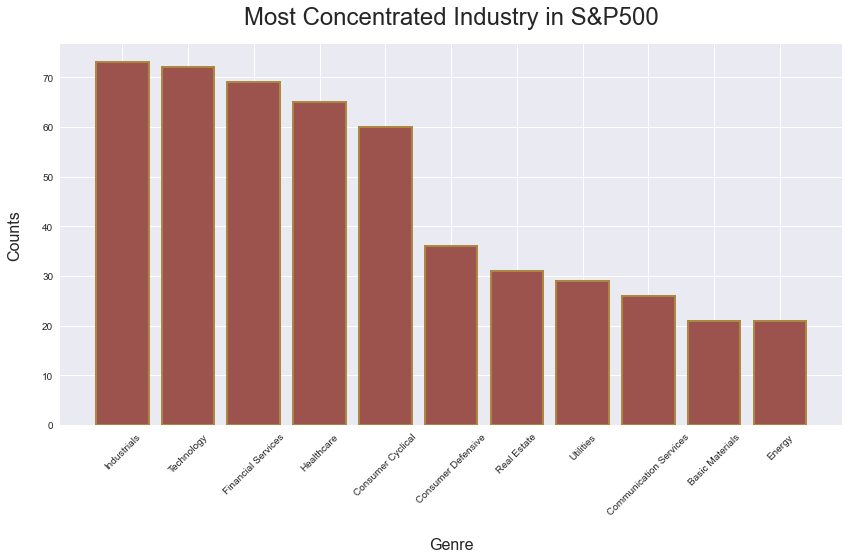

In [46]:
def make_bar_chart(df, attribute, bar_color='#9d534d', edge_color='#ab8742', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = df[attribute].value_counts().index
        ys = df[attribute].value_counts().values
    else:
        xs = df[attribute].value_counts().sort_index().index
        ys = df[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
    
make_bar_chart(industry_df, 'Sector', title='Most Concentrated Industry in S&P500', xlab='Genre', ylab='Counts')

In [47]:
df_complete = industry_df.merge(df_rating, on = 'Name')
df_complete

Name              Sector Ticker  \
0                              3M Co         Industrials    MMM   
1                    A.O. Smith Corp         Industrials    AOS   
2                Abbott Laboratories          Healthcare    ABT   
3                         AbbVie Inc          Healthcare   ABBV   
4                        Abiomed Inc          Healthcare   ABMD   
..                               ...                 ...    ...   
498                   Yum Brands Inc   Consumer Cyclical    YUM   
499  Zebra Technologies Corp Class A          Technology   ZBRA   
500       Zimmer Biomet Holdings Inc          Healthcare    ZBH   
501                 Zions Bancorp NA  Financial Services   ZION   
502               Zoetis Inc Class A          Healthcare    ZTS   

    Date: Morningstar Rating  Morningstar \nRating \nOverall  \
0                   7/5/2022                             4.0   
1                        NaN                             NaN   
2                   7/5/2022                             3.0   
3                   7/5/2022                             2.0   
4                        NaN                             NaN   
..                       ...                             ...   
498                 7/5/2022                             3.0   
499                 7/5/2022                             4.0   
500                 7/5/2022                             5.0   
501                 7/5/2022                             4.0   
502                 7/5/2022                             3.0   

    Morningstar \nFair Value \nStatus Morningstar Fair Value Per Share  \
0                              Active                              186   
1                                 NaN                              NaN   
2                              Active                              104   
3                              Active                              125   
4                                 NaN                              NaN   
..                                ...                              ...   
498                            Active                              125   
499                            Active                              449   
500                            Active                              175   
501                            Active                               70   
502                            Active                              186   

    Fair Value Uncertainty Stock Capital Allocation \nRating  \
0                   Medium                          Standard   
1                      NaN                               NaN   
2                   Medium                          Standard   
3                     High                          Standard   
4                      NaN                               NaN   
..                     ...                               ...   
498                 Medium                          Standard   
499                   High                          Standard   
500                 Medium                         Exemplary   
501                 Medium                          Standard   
502                 Medium                         Exemplary   

    Date: Economic Moat  ... Probability of Default Solvency Score  \
0              7/5/2022  ...                    0.0         341.37   
1                   NaN  ...                    0.0         211.71   
2              7/5/2022  ...                    0.0         300.44   
3              7/5/2022  ...                    0.0         490.74   
4            12/31/2013  ...                    0.0            NaN   
..                  ...  ...                    ...            ...   
498            7/5/2022  ...                    0.0         469.86   
499            7/5/2022  ...                    0.0         278.15   
500            7/5/2022  ...                    0.0         544.71   
501            7/5/2022  ...                    0.1            NaN   
502            7/5/2022  ...  

#### First Logistic Modeling

In [48]:
data = yf.download("^GSPC", start='2012-01-01', end='2022-01-01')
data

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-01-03  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059   
2012-01-04  1277.030029  1278.729980  1268.099976  1277.300049  1277.300049   
2012-01-05  1277.300049  1283.050049  1265.260010  1281.060059  1281.060059   
2012-01-06  1280.930054  1281.839966  1273.339966  1277.810059  1277.810059   
2012-01-09  1277.829956  1281.989990  1274.550049  1280.699951  1280.699951   
...                 ...          ...          ...          ...          ...   
2021-12-27  4733.990234  4791.490234  4733.990234  4791.189941  4791.189941   
2021-12-28  4795.490234  4807.020020  4780.040039  4786.350098  4786.350098   
2021-12-29  4788.640137  4804.060059  4778.080078  4793.060059  4793.060059   
2021-12-30  4794.229980  4808.930176  4775.330078  4778.729980  4778.729980   
2021-12-31  4775.209961  4786.830078  4765.750000  4766.180176  4766.180176   

                Volume  
Date                    
2012-01-03  3943710000  
2012-01-04  3592580000  
2012-01-05  4315950000  
2012-01-06  3656830000  
2012-01-09  3371600000  
...                ...  
2021-12-27  2264120000  
2021-12-28  2217050000  
2021-12-29  2369370000  
2021-12-30  2390990000  
2021-12-31  2446190000  

[2517 rows x 6 columns]

In [49]:
df = data['Adj Close'].pct_change() * 100
df

Date
2012-01-03         NaN
2012-01-04    0.018792
2012-01-05    0.294372
2012-01-06   -0.253696
2012-01-09    0.226160
                ...   
2021-12-27    1.383894
2021-12-28   -0.101015
2021-12-29    0.140190
2021-12-30   -0.298976
2021-12-31   -0.262618
Name: Adj Close, Length: 2517, dtype: float64

In [50]:
df = df.rename('Today')
df

Date
2012-01-03         NaN
2012-01-04    0.018792
2012-01-05    0.294372
2012-01-06   -0.253696
2012-01-09    0.226160
                ...   
2021-12-27    1.383894
2021-12-28   -0.101015
2021-12-29    0.140190
2021-12-30   -0.298976
2021-12-31   -0.262618
Name: Today, Length: 2517, dtype: float64

In [51]:
df = df.reset_index()
df

Date     Today
0    2012-01-03       NaN
1    2012-01-04  0.018792
2    2012-01-05  0.294372
3    2012-01-06 -0.253696
4    2012-01-09  0.226160
...         ...       ...
2512 2021-12-27  1.383894
2513 2021-12-28 -0.101015
2514 2021-12-29  0.140190
2515 2021-12-30 -0.298976
2516 2021-12-31 -0.262618

[2517 rows x 2 columns]

In [52]:
for i in range(1,6):
    df['Lag '+str(i)] = df['Today'].shift(i)
df


Date     Today     Lag 1     Lag 2     Lag 3     Lag 4     Lag 5
0    2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN
1    2012-01-04  0.018792       NaN       NaN       NaN       NaN       NaN
2    2012-01-05  0.294372  0.018792       NaN       NaN       NaN       NaN
3    2012-01-06 -0.253696  0.294372  0.018792       NaN       NaN       NaN
4    2012-01-09  0.226160 -0.253696  0.294372  0.018792       NaN       NaN
...         ...       ...       ...       ...       ...       ...       ...
2512 2021-12-27  1.383894  0.622370  1.018020  1.777793 -1.138806 -1.028768
2513 2021-12-28 -0.101015  1.383894  0.622370  1.018020  1.777793 -1.138806
2514 2021-12-29  0.140190 -0.101015  1.383894  0.622370  1.018020  1.777793
2515 2021-12-30 -0.298976  0.140190 -0.101015  1.383894  0.622370  1.018020
2516 2021-12-31 -0.262618 -0.298976  0.140190 -0.101015  1.383894  0.622370

[2517 rows x 7 columns]

In [53]:
df['Volume'] = data.Volume.shift(1).values/100_000_000
df['Volume']

0           NaN
1       39.4371
2       35.9258
3       43.1595
4       36.5683
         ...   
2512    21.9463
2513    22.6412
2514    22.1705
2515    23.6937
2516    23.9099
Name: Volume, Length: 2517, dtype: float64

In [54]:
df = df.dropna()
df


Date     Today     Lag 1     Lag 2     Lag 3     Lag 4     Lag 5  \
6    2012-01-11  0.030960  0.888577  0.226160 -0.253696  0.294372  0.018792   
7    2012-01-12  0.233661  0.030960  0.888577  0.226160 -0.253696  0.294372   
8    2012-01-13 -0.494792  0.233661  0.030960  0.888577  0.226160 -0.253696   
9    2012-01-17  0.355295 -0.494792  0.233661  0.030960  0.888577  0.226160   
10   2012-01-18  1.110793  0.355295 -0.494792  0.233661  0.030960  0.888577   
...         ...       ...       ...       ...       ...       ...       ...   
2512 2021-12-27  1.383894  0.622370  1.018020  1.777793 -1.138806 -1.028768   
2513 2021-12-28 -0.101015  1.383894  0.622370  1.018020  1.777793 -1.138806   
2514 2021-12-29  0.140190 -0.101015  1.383894  0.622370  1.018020  1.777793   
2515 2021-12-30 -0.298976  0.140190 -0.101015  1.383894  0.622370  1.018020   
2516 2021-12-31 -0.262618 -0.298976  0.140190 -0.101015  1.383894  0.622370   

       Volume  
6     42.2196  
7     39.6812  
8     40.1989  
9     36.9237  
10    40.1049  
...       ...  
2512  21.9463  
2513  22.6412  
2514  22.1705  
2515  23.6937  
2516  23.9099  

[2511 rows x 8 columns]

In [55]:
df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]
df

Date     Today     Lag 1     Lag 2     Lag 3     Lag 4     Lag 5  \
6    2012-01-11  0.030960  0.888577  0.226160 -0.253696  0.294372  0.018792   
7    2012-01-12  0.233661  0.030960  0.888577  0.226160 -0.253696  0.294372   
8    2012-01-13 -0.494792  0.233661  0.030960  0.888577  0.226160 -0.253696   
9    2012-01-17  0.355295 -0.494792  0.233661  0.030960  0.888577  0.226160   
10   2012-01-18  1.110793  0.355295 -0.494792  0.233661  0.030960  0.888577   
...         ...       ...       ...       ...       ...       ...       ...   
2512 2021-12-27  1.383894  0.622370  1.018020  1.777793 -1.138806 -1.028768   
2513 2021-12-28 -0.101015  1.383894  0.622370  1.018020  1.777793 -1.138806   
2514 2021-12-29  0.140190 -0.101015  1.383894  0.622370  1.018020  1.777793   
2515 2021-12-30 -0.298976  0.140190 -0.101015  1.383894  0.622370  1.018020   
2516 2021-12-31 -0.262618 -0.298976  0.140190 -0.101015  1.383894  0.622370   

       Volume  Direction  
6     42.2196          1  
7     39.6812          1  
8     40.1989          0  
9     36.9237          1  
10    40.1049          1  
...       ...        ...  
2512  21.9463          1  
2513  22.6412          0  
2514  22.1705          1  
2515  23.6937          0  
2516  23.9099          0  

[2511 rows x 9 columns]

In [56]:
# add a constant 
df = sm.add_constant(df)
df

const       Date     Today     Lag 1     Lag 2     Lag 3     Lag 4  \
6       1.0 2012-01-11  0.030960  0.888577  0.226160 -0.253696  0.294372   
7       1.0 2012-01-12  0.233661  0.030960  0.888577  0.226160 -0.253696   
8       1.0 2012-01-13 -0.494792  0.233661  0.030960  0.888577  0.226160   
9       1.0 2012-01-17  0.355295 -0.494792  0.233661  0.030960  0.888577   
10      1.0 2012-01-18  1.110793  0.355295 -0.494792  0.233661  0.030960   
...     ...        ...       ...       ...       ...       ...       ...   
2512    1.0 2021-12-27  1.383894  0.622370  1.018020  1.777793 -1.138806   
2513    1.0 2021-12-28 -0.101015  1.383894  0.622370  1.018020  1.777793   
2514    1.0 2021-12-29  0.140190 -0.101015  1.383894  0.622370  1.018020   
2515    1.0 2021-12-30 -0.298976  0.140190 -0.101015  1.383894  0.622370   
2516    1.0 2021-12-31 -0.262618 -0.298976  0.140190 -0.101015  1.383894   

         Lag 5   Volume  Direction  
6     0.018792  42.2196          1  
7     0.294372  39.6812          1  
8    -0.253696  40.1989          0  
9     0.226160  36.9237          1  
10    0.888577  40.1049          1  
...        ...      ...        ...  
2512 -1.028768  21.9463          1  
2513 -1.138806  22.6412          0  
2514  1.777793  22.1705          1  
2515  1.018020  23.6937          0  
2516  0.622370  23.9099          0  

[2511 rows x 10 columns]

In [57]:
X = df[['const', 'Lag 1',  'Lag 2',  'Lag 3',  'Lag 4',  'Lag 5', 'Volume']]
y = df.Direction

In [58]:
model = sm.Logit(y,X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.685058
         Iterations 5


In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 2511
Model:                          Logit   Df Residuals:                     2504
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                0.004483
Time:                        22:01:26   Log-Likelihood:                -1720.2
converged:                       True   LL-Null:                       -1727.9
Covariance Type:            nonrobust   LLR p-value:                   0.01675
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1859      0.176      1.056      0.291      -0.159       0.531
Lag 1         -0.1372      0.042     -3.259      0.001      -0.220      -0.055
Lag 2          0.0278      0.041      0.672      0.502      -0.053       0.109
Lag 3         -0.0345      0.042     -0.824      0.410      -0.116       0.048
Lag 4         -0.0406      0.041     -0.983      0.326      -0.121       0.040
Lag 5         -0.0525      0.041     -1.274      0.203      -0.133       0.028
Volume         0.0008      0.005      0.176      0.860      -0.008       0.010
==============================================================================
"""

In [60]:
prediction = result.predict(X)
prediction

6       0.525060
7       0.556143
8       0.540117
9       0.560004
10      0.524959
          ...   
2512    0.546269
2513    0.496089
2514    0.524983
2515    0.514156
2516    0.541113
Length: 2511, dtype: float64

In [61]:
def confusion_matrix(act, pred):
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals), 
                                   pd.Series(predtrans),
                                  rownames = ['Actual'],
                                  colnames = ['Predicted'])
    return confusion_matrix

In [62]:
confusion_matrix(y, prediction)

Predicted  Down    Up
Actual               
Down         77  1053
Up           58  1323

In [63]:
len(df)
(77+1323)/2511

0.5575467941059339

In [64]:
X_train = df[df.Date.dt.year < 2018][['const', 'Lag 1',  'Lag 2',  'Lag 3',  'Lag 4',  'Lag 5', 'Volume']]
y_train = df[df.Date.dt.year < 2018]['Direction']
X_test = df[df.Date.dt.year >= 2018][['const', 'Lag 1',  'Lag 2',  'Lag 3',  'Lag 4',  'Lag 5', 'Volume']]
y_test = df[df.Date.dt.year >= 2018]['Direction']

In [65]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.687313
         Iterations 4


In [66]:
prediction = result.predict(X_test)
confusion_matrix(y_test, prediction)

Predicted  Down   Up
Actual              
Down         64  374
Up           53  517

In [67]:
len(X_test)
(64+517)/1008

0.5763888888888888

Predicting stock movement range for next 12 months by using ARIMA model

In [68]:
amzn = pd.read_csv('data/AMZN.csv')
amzn

Date        Open        High        Low       Close   Adj Close  \
0     6/1/1997    0.075521    0.085417   0.068750    0.077083    0.077083   
1     7/1/1997    0.077083    0.128646   0.075521    0.119792    0.119792   
2     8/1/1997    0.117188    0.120833   0.096875    0.116927    0.116927   
3     9/1/1997    0.117188    0.240625   0.115625    0.216927    0.216927   
4    10/1/1997    0.221875    0.275000   0.176042    0.254167    0.254167   
..         ...         ...         ...        ...         ...         ...   
268  10/1/2019   87.300003   89.942497  84.252998   88.833000   88.833000   
269  11/1/2019   89.400497   91.234497  86.135498   90.040001   90.040001   
270  12/1/2019   90.220001   95.070000  86.750000   92.391998   92.391998   
271   1/1/2020   93.750000  102.786003  90.766998  100.435997  100.435997   
272   2/1/2020  100.529999  109.297501  90.556503   94.187500   94.187500   

         Volume  
0    1063272000  
1    2172288000  
2     638136000  
3    2157240000  
4    2103744000  
..          ...  
268  1407210000  
269  1041524000  
270  1362992000  
271  1693966000  
272  1850202000  

[273 rows x 7 columns]

In [69]:
df = amzn[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df

Close
Date                  
1997-06-01    0.077083
1997-07-01    0.119792
1997-08-01    0.116927
1997-09-01    0.216927
1997-10-01    0.254167
...                ...
2019-10-01   88.833000
2019-11-01   90.040001
2019-12-01   92.391998
2020-01-01  100.435997
2020-02-01   94.187500

[273 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

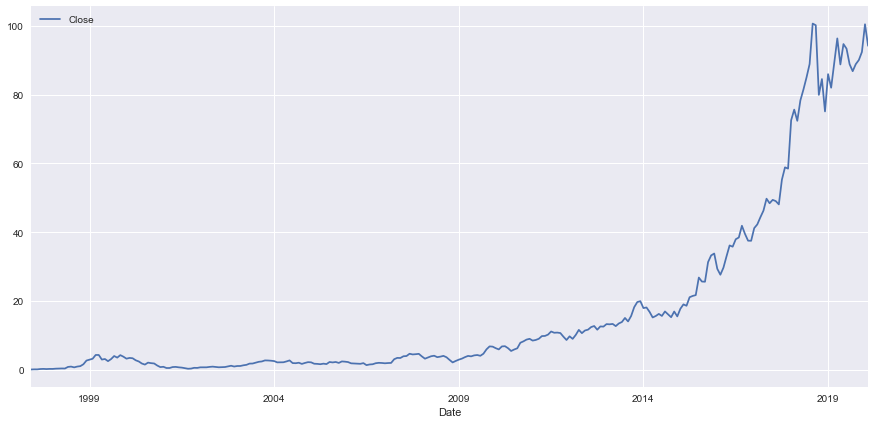

In [70]:
df.plot(style="-")

In [71]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [72]:
warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = sm.tsa.statespace.SARIMAX(df, order=param,       
enforce_stationarity=True, enforce_invertibility=True)
         
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
        continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)     
print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))

ARIMA(0, 0, 0) - AIC:2651.3220220281864
ARIMA(0, 0, 1) - AIC:2305.9815123030044
ARIMA(0, 0, 2) - AIC:2081.483493089984
ARIMA(0, 1, 0) - AIC:1279.7271473556423
ARIMA(0, 1, 1) - AIC:1277.7370078789645
ARIMA(0, 1, 2) - AIC:1277.0534580774558
ARIMA(0, 2, 0) - AIC:1493.8178183214254
ARIMA(0, 2, 1) - AIC:1275.2014625660686
ARIMA(0, 2, 2) - AIC:1268.2243778552502
ARIMA(1, 0, 0) - AIC:1292.7737938745938
ARIMA(1, 0, 1) - AIC:1290.8426621543729
ARIMA(1, 0, 2) - AIC:1290.1363440387893
ARIMA(1, 1, 0) - AIC:1277.1459194260751
ARIMA(1, 1, 1) - AIC:1278.746086227802
ARIMA(1, 1, 2) - AIC:1278.9513942569843
ARIMA(1, 2, 0) - AIC:1381.8334520958283
ARIMA(1, 2, 1) - AIC:1267.9431009690052
ARIMA(1, 2, 2) - AIC:1269.943096847162
ARIMA(2, 0, 0) - AIC:1290.2555710112001
ARIMA(2, 0, 1) - AIC:1296.6453723122527
ARIMA(2, 0, 2) - AIC:1293.2398362687138
ARIMA(2, 1, 0) - AIC:1278.143905645206
ARIMA(2, 1, 1) - AIC:1279.762742370211
ARIMA(2, 1, 2) - AIC:1270.6231824516913
ARIMA(2, 2, 0) - AIC:1340.827607177809
ARIMA(

In [73]:
model = ARIMA(df, order=(2,2,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  273
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -628.856
Date:                Thu, 07 Jul 2022   AIC                           1267.712
Time:                        22:01:28   BIC                           1285.723
Sample:                    06-01-1997   HQIC                          1274.944
                         - 02-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0097      0.095    -10.667      0.000      -1.195      -0.824
ar.L2         -0.2276      0.044     -5.213      0.000      -0.313      -0.142
ma.L1         -0.1511      0.094     -1.612      0.107      -0.335       0.033
ma.L2         -0.7961      0.093     -8.540      0.000      -0.979      -0.613
sigma2         5.9938      0.171     35.104      0.000       5.659       6.328
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9335.75
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):             128.04   Skew:                            -1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

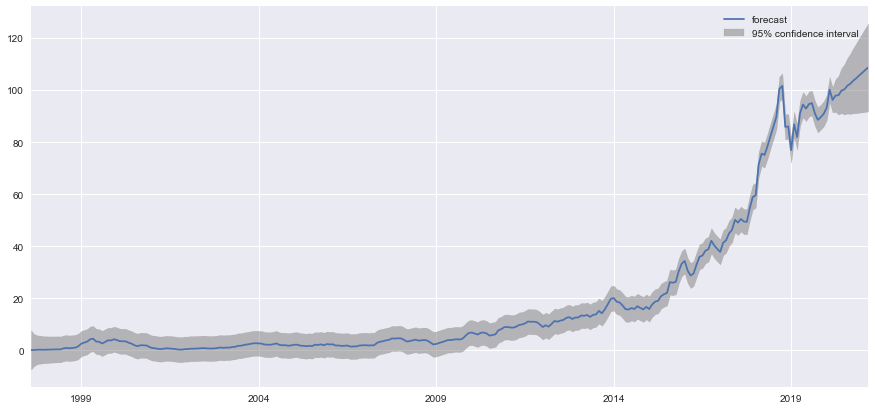

In [74]:
plot_predict(model, start=2, end=len(df)+12)
plt.show()

### Recommendation System

will finish this section ASAP and the top5 recommendations will be selected for next step to generate optimized portfolio.

### Model Portfolio Generation 

In [75]:
log_ret = np.log(price_data/price_data.shift(1))

In [76]:
cov_mat = log_ret.cov() * 252
print(cov_mat)

Symbols      AAPL      MSFT      AMZN     GOOGL      TSLA
Symbols                                                  
AAPL     0.082365  0.043305  0.041534  0.039620  0.056186
MSFT     0.043305  0.067318  0.044637  0.043116  0.052809
AMZN     0.041534  0.044637  0.098372  0.047603  0.060847
GOOGL    0.039620  0.043116  0.047603  0.066139  0.050002
TSLA     0.056186  0.052809  0.060847  0.050002  0.316273


In [77]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [78]:
for i in range(num_port):
  wts = np.random.uniform(size = len(price_data.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_ret.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

In [79]:
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.22346663 0.3270555  0.09095074 0.35447051 0.00405662]


In [80]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.13185888 0.47220779 0.15398316 0.00151012 0.24044006]


In [81]:
print(sharpe_ratio.max())

1.3053316393511136


In [82]:
print(port_risk.min())

0.22558909673687355


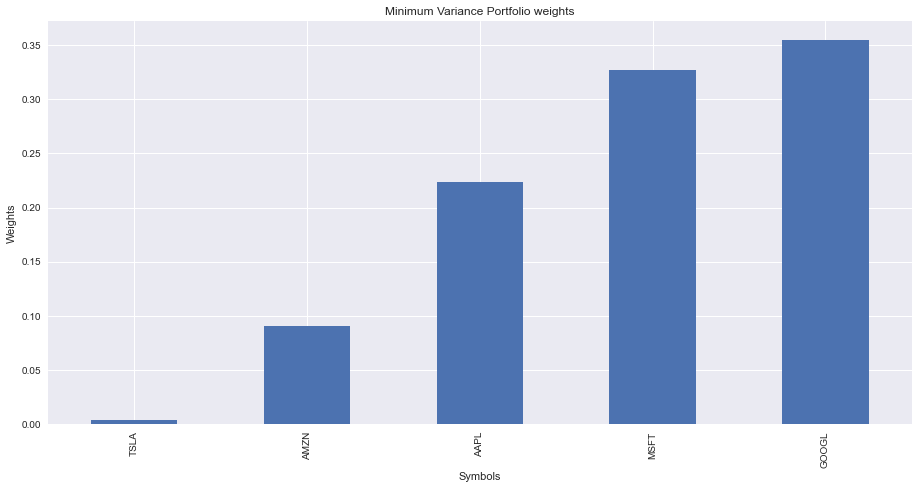

In [83]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

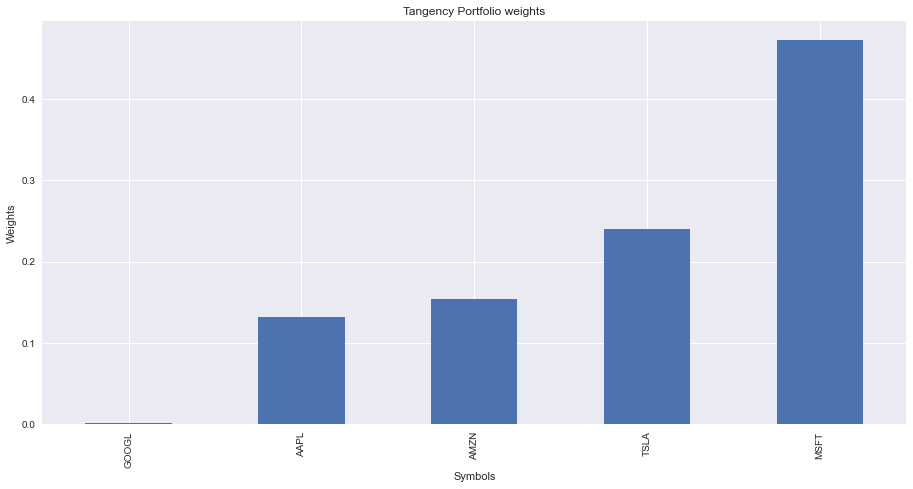

In [84]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();

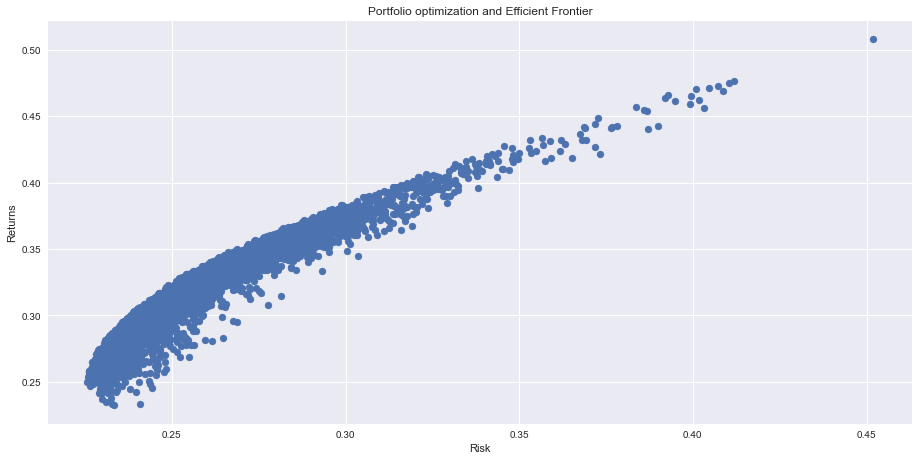

In [85]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show();

#### Fama-French Factors modeling

Use Fama-Frech model to find the factors that most related to the market return

In [118]:
# import requests
# import pandas as pd 
# from yahoo_fin import stock_info as si 
# from pandas_datareader import DataReader
# import numpy as np

# tickers = si.tickers_sp500()
# recommendations = []

# for ticker in tickers:
#     lhs_url = 'https://query2.finance.yahoo.com/v10/finance/quoteSummary/'
#     rhs_url = '?formatted=true&crumb=swg7qs5y9UP&lang=en-US&region=US&' \
#               'modules=upgradeDowngradeHistory,recommendationTrend,' \
#               'financialData,earningsHistory,earningsTrend,industryTrend&' \
#               'corsDomain=finance.yahoo.com'
    
#     headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
#     url =  lhs_url + ticker + rhs_url
#     r = requests.get(url, headers=headers)
#     if not r.ok:
#         recommendation = 6
#     try:
#         result = r.json()['quoteSummary']['result'][0]
#         recommendation =result['financialData']['recommendationMean']['fmt']
#     except:
#         recommendation = 6
    
#     recommendations.append(recommendation)
    
#     print("--------------------------------------------")
#     print ("{} has an average recommendation of: ".format(ticker), recommendation)
#     #time.sleep(0.5)
    
# dataframe = pd.DataFrame(list(zip(tickers, recommendations)), columns =['Company', 'Recommendations']) 
# dataframe = dataframe.set_index('Company')
# dataframe.to_csv('recommendations.csv')

# print (dataframe)

In [117]:
# This is just an example for period of 1980 to 2022. I will dig deeper into sub-periods for more details
ff_factors = pd.read_csv('data/F-F_Research_Data_Factors.csv', skiprows = 3, nrows = 1151, index_col = 0)
ff_factors

Mkt-RF   SMB    HML    RF
192607    2.96 -2.38  -2.73  0.22
192608    2.64 -1.47   4.14  0.25
192609    0.36 -1.39   0.12  0.23
192610   -3.24 -0.13   0.65  0.32
192611    2.53 -0.16  -0.38  0.31
...        ...   ...    ...   ...
202201   -6.25 -5.93  12.74  0.00
202202   -2.29  2.18   3.09  0.00
202203    3.06 -1.61  -1.82  0.00
202204   -9.45 -1.40   6.16  0.00
202205   -0.34 -1.87   8.38  0.03

[1151 rows x 4 columns]

In [87]:
ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
ff_factors

Mkt-RF   SMB    HML    RF
1926-07-01    2.96 -2.38  -2.73  0.22
1926-08-01    2.64 -1.47   4.14  0.25
1926-09-01    0.36 -1.39   0.12  0.23
1926-10-01   -3.24 -0.13   0.65  0.32
1926-11-01    2.53 -0.16  -0.38  0.31
...            ...   ...    ...   ...
2022-01-01   -6.25 -5.93  12.74  0.00
2022-02-01   -2.29  2.18   3.09  0.00
2022-03-01    3.06 -1.61  -1.82  0.00
2022-04-01   -9.45 -1.40   6.16  0.00
2022-05-01   -0.34 -1.87   8.38  0.03

[1151 rows x 4 columns]

In [88]:
ff_factors.index = ff_factors.index + pd.offsets.MonthEnd()
ff_factors

Mkt-RF   SMB    HML    RF
1926-07-31    2.96 -2.38  -2.73  0.22
1926-08-31    2.64 -1.47   4.14  0.25
1926-09-30    0.36 -1.39   0.12  0.23
1926-10-31   -3.24 -0.13   0.65  0.32
1926-11-30    2.53 -0.16  -0.38  0.31
...            ...   ...    ...   ...
2022-01-31   -6.25 -5.93  12.74  0.00
2022-02-28   -2.29  2.18   3.09  0.00
2022-03-31    3.06 -1.61  -1.82  0.00
2022-04-30   -9.45 -1.40   6.16  0.00
2022-05-31   -0.34 -1.87   8.38  0.03

[1151 rows x 4 columns]

In [89]:
ff_factors = ff_factors.apply(lambda x: x/ 100)
ff_factors

Mkt-RF     SMB     HML      RF
1926-07-31  0.0296 -0.0238 -0.0273  0.0022
1926-08-31  0.0264 -0.0147  0.0414  0.0025
1926-09-30  0.0036 -0.0139  0.0012  0.0023
1926-10-31 -0.0324 -0.0013  0.0065  0.0032
1926-11-30  0.0253 -0.0016 -0.0038  0.0031
...            ...     ...     ...     ...
2022-01-31 -0.0625 -0.0593  0.1274  0.0000
2022-02-28 -0.0229  0.0218  0.0309  0.0000
2022-03-31  0.0306 -0.0161 -0.0182  0.0000
2022-04-30 -0.0945 -0.0140  0.0616  0.0000
2022-05-31 -0.0034 -0.0187  0.0838  0.0003

[1151 rows x 4 columns]

In [90]:
# Last day of FF data
ff_last = ff_factors.index[ff_factors.shape[0] - 1].date()
# Build the get_price function
# We need 3 arguments, ticker, start and end date
def get_price_data(ticker, start, end):
    price = web.get_data_yahoo(ticker, start, end)
    price = price['Adj Close'] # keep only the Adj Price col
    return price

In [91]:
# Get Price data for Fidelity's fund
price_data = get_price_data("FCNTX", "1980-01-01", "2022-06-01")
# Make sure to only have data upto last date of Fama French data
price_data = price_data.loc[:ff_last]
price_data

Date
1980-01-02     0.134105
1980-01-03     0.132336
1980-01-04     0.134341
1980-01-07     0.133869
1980-01-08     0.137643
                ...    
2022-05-24    13.870000
2022-05-25    14.000000
2022-05-26    14.300000
2022-05-27    14.650000
2022-05-31    14.580000
Name: Adj Close, Length: 10695, dtype: float64

In [92]:
def get_return_data(price_data, period = "M"):
    
    # Resample the data to monthly price
    price = price_data.resample(period).last()
    
    # Calculate the percent change
    ret_data = price.pct_change()[1:]
    
    # convert from series to DataFrame
    ret_data = pd.DataFrame(ret_data)
    
    # Rename the Column
    ret_data.columns = ['portfolio']
    return ret_data
    
ret_data = get_return_data(price_data, "M")
ret_data.tail()

portfolio
Date                 
2022-01-31  -0.082090
2022-02-28  -0.048706
2022-03-31   0.032777
2022-04-30  -0.115569
2022-05-31  -0.012864

In [93]:
# Merging the data
all_data = pd.merge(pd.DataFrame(ret_data),ff_factors, how = 'inner', left_index= True, right_index= True)
# Rename the columns
all_data.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
# Calculate the excess returns
all_data['port_excess'] = all_data['portfolio'] - all_data['RF']
all_data

portfolio  mkt_excess     SMB     HML      RF  port_excess
1980-02-29  -0.016874     -0.0122 -0.0185  0.0061  0.0089    -0.025774
1980-03-31  -0.089431     -0.1290 -0.0664 -0.0101  0.0121    -0.101531
1980-04-30   0.017857      0.0397  0.0105  0.0108  0.0126     0.005257
1980-05-31   0.078947      0.0526  0.0213  0.0038  0.0081     0.070847
1980-06-30   0.011744      0.0306  0.0166 -0.0076  0.0061     0.005644
...               ...         ...     ...     ...     ...          ...
2022-01-31  -0.082090     -0.0625 -0.0593  0.1274  0.0000    -0.082090
2022-02-28  -0.048706     -0.0229  0.0218  0.0309  0.0000    -0.048706
2022-03-31   0.032777      0.0306 -0.0161 -0.0182  0.0000     0.032777
2022-04-30  -0.115569     -0.0945 -0.0140  0.0616  0.0000    -0.115569
2022-05-31  -0.012864     -0.0034 -0.0187  0.0838  0.0003    -0.013164

[508 rows x 6 columns]

In [94]:
model = sm.formula.ols(formula = "port_excess ~ mkt_excess + SMB + HML", data = all_data).fit()
model.params

Intercept     0.001204
mkt_excess    0.900895
SMB           0.011595
HML          -0.132520
dtype: float64

#### Exploring random dataset

In [95]:
Rdata = pyreadr.read_r('data/data_ml.RData')

data = Rdata['data_ml']
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

data

stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0             13 2006-12-31          0.25         0.33         0.27   
1             13 2007-01-31          0.25         0.32         0.28   
2             13 2007-02-28          0.26         0.30         0.30   
3             17 2015-03-31          0.73         0.64         0.70   
4             17 2015-04-30          0.72         0.62         0.66   
...          ...        ...           ...          ...          ...   
283375      1205 2004-05-31          0.97         0.97         0.98   
283376      1205 2004-07-31          0.97         0.96         0.98   
283377      1205 2004-08-31          0.97         0.96         0.97   
283378      1205 2004-09-30          0.97         0.96         0.97   
283379       292 2000-04-30          0.41         0.63         0.52   

        Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  \
0                 0.22    0.33  0.01         0.13         0.84  ...   
1                 0.22    0.40  0.01         0.13         0.84  ...   
2                 0.22    0.15  0.01         0.13         0.84  ...   
3                 0.40    0.47  0.01         0.70         0.74  ...   
4                 0.40    0.46  0.01         0.70         0.74  ...   
...                ...     ...   ...          ...          ...  ...   
283375            0.19    0.74  1.00         0.54         0.90  ...   
283376            0.19    0.75  1.00         0.53         0.90  ...   
283377            0.19    0.75  1.00         0.53         0.90  ...   
283378            0.18    0.93  1.00         0.52         0.90  ...   
283379            0.60    0.86  0.50         0.37         0.37  ...   

        Total_Capital  Total_Debt  Total_Debt_Capital  \
0                0.02        0.27                1.00   
1                0.02        0.27                1.00   
2                0.02        0.27                1.00   
3                0.40        0.75                1.00   
4                0.40        0.75                1.00   
...               ...         ...                 ...   
283375           0.99        0.99                0.57   
283376           0.99        0.99                0.58   
283377           0.99        0.99                0.58   
283378           0.99        0.99                0.57   
283379           0.06        0.18                0.28   

        Total_Liabilities_Total_Assets  Vol1Y_Usd  Vol3Y_Usd  R1M_Usd  \
0                                 0.92       0.84       0.88    0.089   
1                                 0.92       0.84       0.88    0.039   
2                                 0.92       0.87       0.88   -0.012   
3                                 1.00       1.00       0.99    0.174   
4                                 1.00       1.00       0.99   -0.106   
...                                ...        ...        ...      ...   
283375                            0.59       0.34       0.63   -0.029   
283376                            0.60       0.29       0.64    0.028   
283377                            0.60       0.27       0.64    0.011   
283378                            0.60       0.26       0.66    0.045   
283379                            0.18       0.97       0.96   -0.356   

        R3M_Usd  R6M_Usd  R12M_Usd  
0         0.104    0.344    -0.041  
1         0.091   -0.011    -0.253  
2         0.101    0.118    -0.366  
3        -0.144   -0.518    -0.376  
4        -0.576   -0.535    -0.113  
...         ...      ...       ...  
283375   -0.027    0.038     0.112  
283376    0.077    0.175     0.122  
283377    0.076    0.152     0.091  
283378    0.178    0.196     0.040  
283379   -0.195   -0.148    -0.544  

[283380 rows x 99 columns]

In [96]:
data.columns

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

In [97]:
data.groupby('date')['stock_id'].count()

date
1998-11-30     880
1998-12-31     877
1999-01-31     878
1999-02-28     881
1999-03-31     891
              ... 
2018-11-30    1109
2018-12-31     911
2019-01-31     907
2019-02-28     555
2019-03-31     552
Name: stock_id, Length: 245, dtype: int64

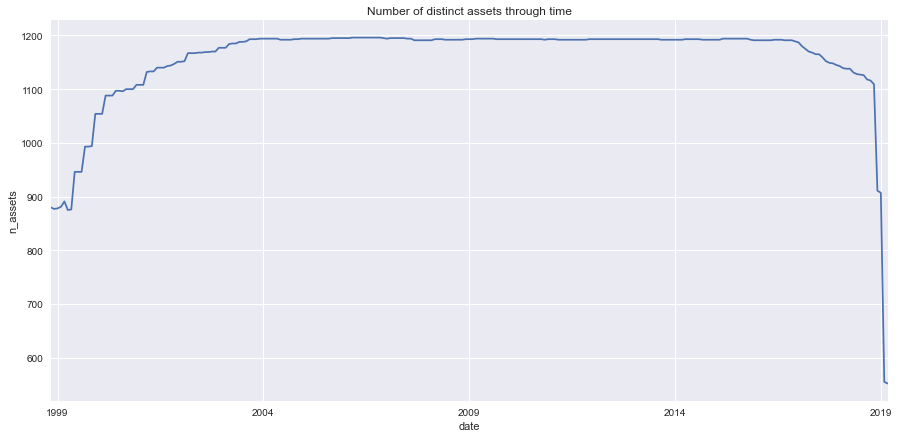

In [98]:
data.groupby('date')['stock_id'].count().plot(ylabel='n_assets',title='Number of distinct assets through time');


In [99]:
features = data.columns.to_list()[2:-4]
features

['Advt_12M_Usd',
 'Advt_3M_Usd',
 'Advt_6M_Usd',
 'Asset_Turnover',
 'Bb_Yld',
 'Bv',
 'Capex_Ps_Cf',
 'Capex_Sales',
 'Cash_Div_Cf',
 'Cash_Per_Share',
 'Cf_Sales',
 'Debtequity',
 'Div_Yld',
 'Dps',
 'Ebit_Bv',
 'Ebit_Noa',
 'Ebit_Oa',
 'Ebit_Ta',
 'Ebitda_Margin',
 'Eps',
 'Eps_Basic',
 'Eps_Basic_Gr',
 'Eps_Contin_Oper',
 'Eps_Dil',
 'Ev',
 'Ev_Ebitda',
 'Fa_Ci',
 'Fcf',
 'Fcf_Bv',
 'Fcf_Ce',
 'Fcf_Margin',
 'Fcf_Noa',
 'Fcf_Oa',
 'Fcf_Ta',
 'Fcf_Tbv',
 'Fcf_Toa',
 'Fcf_Yld',
 'Free_Ps_Cf',
 'Int_Rev',
 'Interest_Expense',
 'Mkt_Cap_12M_Usd',
 'Mkt_Cap_3M_Usd',
 'Mkt_Cap_6M_Usd',
 'Mom_11M_Usd',
 'Mom_5M_Usd',
 'Mom_Sharp_11M_Usd',
 'Mom_Sharp_5M_Usd',
 'Nd_Ebitda',
 'Net_Debt',
 'Net_Debt_Cf',
 'Net_Margin',
 'Netdebtyield',
 'Ni',
 'Ni_Avail_Margin',
 'Ni_Oa',
 'Ni_Toa',
 'Noa',
 'Oa',
 'Ocf',
 'Ocf_Bv',
 'Ocf_Ce',
 'Ocf_Margin',
 'Ocf_Noa',
 'Ocf_Oa',
 'Ocf_Ta',
 'Ocf_Tbv',
 'Ocf_Toa',
 'Op_Margin',
 'Op_Prt_Margin',
 'Oper_Ps_Net_Cf',
 'Pb',
 'Pe',
 'Ptx_Mgn',
 'Recurring_Earni

In [100]:
data['R1M_Usd_C'] = data.groupby('date')['R1M_Usd'].apply(lambda x: (x > x.median()))

#### Testing a simple portfolio strategy. I will apply this concept to the model portfolio that was generated before.

In [101]:
df = web.get_data_yahoo('SPY', '2012-01-01', '2019-01-01')
df = df.dropna()
df = df.iloc[:,:4]
df

High         Low        Open       Close
Date                                                      
2012-01-03  128.380005  127.430000  127.760002  127.500000
2012-01-04  127.809998  126.709999  127.199997  127.699997
2012-01-05  128.229996  126.430000  127.010002  128.039993
2012-01-06  128.220001  127.290001  128.199997  127.709999
2012-01-09  128.179993  127.410004  128.000000  128.020004
...                ...         ...         ...         ...
2018-12-24  240.839996  234.270004  239.039993  234.339996
2018-12-26  246.179993  233.759995  235.970001  246.179993
2018-12-27  248.289993  238.960007  242.570007  248.070007
2018-12-28  251.399994  246.449997  249.580002  247.750000
2018-12-31  250.190002  247.470001  249.559998  249.919998

[1760 rows x 4 columns]

In [102]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
# df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [103]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [104]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [105]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [106]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

0                        1
0        High   [-0.26567526364054483]
1         Low    [-0.3778038140146504]
2        Open    [0.43753451016714595]
3       Close    [0.21242303958858935]
4        S_10  [-0.008088932385012525]
5        Corr    [0.06997295970974929]
6  Open-Close  [-0.023970740961447093]
7   Open-Open   [0.004367903512723634]

In [107]:
probability = model.predict_proba(X_test)
probability

array([[0.41806316, 0.58193684],
       [0.50981701, 0.49018299],
       [0.52982694, 0.47017306],
       ...,
       [0.26244825, 0.73755175],
       [0.43542917, 0.56457083],
       [0.35415979, 0.64584021]])

In [108]:
predicted = model.predict(X_test)
predicted

array([ 1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [109]:
print(metrics.confusion_matrix(y_test, predicted))

[[101 137]
 [125 160]]


In [110]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.45      0.42      0.44       238
           1       0.54      0.56      0.55       285

    accuracy                           0.50       523
   macro avg       0.49      0.49      0.49       523
weighted avg       0.50      0.50      0.50       523



In [111]:
print(model.score(X_test,y_test))


0.49904397705544934


In [112]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.54285714 0.54285714 0.52298851 0.54022989 0.50574713 0.54597701
 0.54022989 0.55747126 0.54597701 0.44827586]
0.5292610837438423


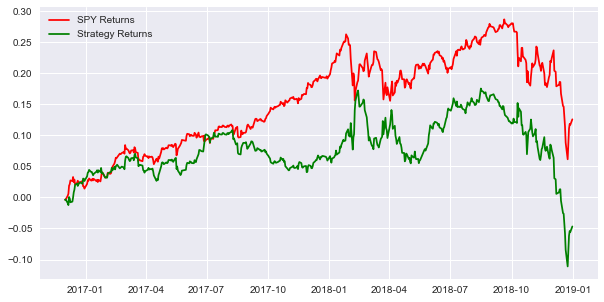

In [113]:
df['Predicted_Signal'] = model.predict(X)
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_spy_returns = np.cumsum(df[split:]['SPY_returns'])

df['Startegy_returns'] = df['SPY_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_spy_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***